<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Actividad 4</title>
    <style>
        body {
            font-family: 'OPTIMA', serif;
            margin: 0;
            padding: 0;
            background-color: #1B2E3C;
        }
        header {
            font-family: 'OPTIMA', serif;
            background-color: #1B2E3C;
            color: #fff;
            text-align: center;
            padding: 20px 0;
        }
        main {
            font-family: 'OPTIMA', serif;
            max-width: 800px;
            margin: 20px auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            font-family: 'OPTIMA', serif;
            margin: 0;
            color:white;
        }
        h2 {
            font-family: 'OPTIMA', serif;
            margin: 0;
            text-align: center;
        }
        h3,h5 {
            font-family: 'OPTIMA', serif;
            margin: 0;
            text-align: center;
        }
        section {
            margin-bottom: 20px;
        }
        footer {
            text-align: center;
            padding: 10px 0;
            color: #1B2E3C;
            width: 100%;
        }
    </style>
</head>
<body>
    <header>
        <h1>Laboratorio 1</h1>
    </header>
    <main>
        <section>
            <h3>Deep Learning</h3>
            <h3>Miguel Feles</h3>
            <h3>Docente: Albert Montenegro</h3>
            <br>
            <h5>Pregrado en Ciencia de Datos</h5>
            <h5>Universidad Externado de Colombia</h5>
        </section>
            </main>
    <footer>
        <p>&copy; 2024 Universidad Externado de Colombia - Ciencia de Datos</p>
    </footer>
</body>
</html>


# Intro

<h3 style = "font-family: 'OPTIMA', serif;"> <b> Importaciones </b> </h3>

<p style = "font-family: 'OPTIMA', serif;">
Vamos a empezar con nuestras importaciones. Aquí importamos <i>TensorFlow</i> y lo llamamos tf para facilitar su uso.<br>El paquete para definir una red neuronal como un conjunto de capas secuenciales se llama <i>Keras</i>, así que también lo importamos.
</p>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import time
from tensorflow.keras import regularizers

#Keras es la arquitectura y esqueleto de la red.
#Tensorflow se encarga de las cuentas a lo largo de la red.


<h3 style = "font-family: 'OPTIMA', serif;"> <b> Funciones necesarias </b> </h3>
<p style = "font-family: 'OPTIMA', serif;">
Estas son las funciones necesarias para realizar una interpretación y entendimiento adecuado de los resultados en el entrenamiento del modelo de red neuronal con solo una capa.
</p>

In [2]:
def graficas(train_loss, train_loss_stopping):
    """
    Esta función recibe tres parametros:
        funcion1: es una función que realice un grafico de puntos en matplotlib que irá en el lado izquierdo de la gráfica.
        funcion2: esta función recibe un gráfico de alguna función que se desee graficar en matplotlib.
        train_loss: esta función recibe los resultados la perdida en el entrenamiento de ,os datos,
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(train_loss, label='Training Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()


    plt.subplot(1, 2, 1)
    ax2.plot(train_loss_stopping, label='Training Loss')
    ax2.set_title('Model Loss - Stopping')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

def funciones(funcion1, funcion2, título):
    """
    Esta función recibe tres parametros:
        funcion1: es una función que realice un grafico de puntos en matplotlib que irá en el lado izquierdo de la gráfica.
        funcion2: esta función recibe un gráfico de alguna función que se desee graficar en matplotlib.
        train_loss: esta función recibe los resultados la perdida en el entrenamiento de ,os datos,
    """
    fig, (ax1) = plt.subplots(1, 1, figsize=(3, 3))
    funcion1(ax1)
    funcion2(ax1)

    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")

    plt.title(título)
    plt.tight_layout()
    plt.show()

<h3 style = "font-family: 'OPTIMA', serif;"> <b> Esquema de modelos </b> </h3>
<p style = "font-family: 'OPTIMA', serif;">
Estos son los modelos utilizados en las tres pruebas diferentes, los modelos están separados para ponerlos a prueba con datos diferentes. No obstante, arquitectura del modelo en los tres casos es la misma.
</p>

In [3]:
modelo_lineal = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
modelo_lineal.compile(optimizer='sgd', loss='mean_squared_error')

modelo_cuadratico = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
modelo_cuadratico.compile(optimizer='sgd', loss='mean_squared_error')

modelo_circular = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
modelo_circular.compile(optimizer='sgd', loss='mean_squared_error')


/Users/felesiu/miniforge3/envs/deeplearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h3 style = "font-family: 'OPTIMA', serif;"> <b>Punto 1: Generar Conjunto de Datos </b> </h3>

<li style = "font-family: 'OPTIMA', serif;">
Generar un conjunto de 20 datos que siga una relación lineal con la adición de ruido gaussiano. 
</li>

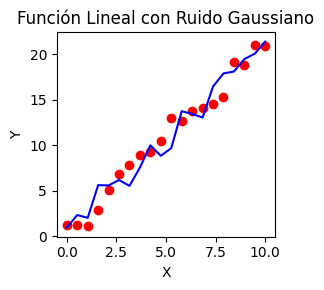

In [4]:
x_lineal = np.linspace(0, 10, 20)
y_lineal = 2 * x_lineal + 1 + np.random.normal(0, 1, 20)

x_continuo = np.linspace(0, 10, 20)
y_continuo = 2 * x_lineal + 1 + np.random.normal(0, 1, 20)
funciones(lambda ax: ax.scatter(x_lineal, y_lineal, color='red', label='Puntos'), lambda ax: ax.plot(x_continuo, y_continuo, color='blue', label='Función cuadrática'), 'Función Lineal con Ruido Gaussiano')

<li style = "font-family: 'OPTIMA', serif;">
Generar un conjunto de 20 datos que sigan una función parabólica.  
</li>

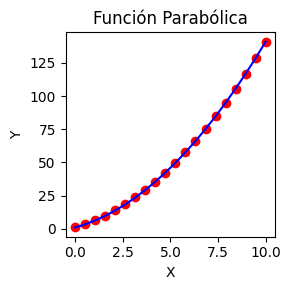

In [5]:
x_cuadratico = np.linspace(0, 10, 20)
y_cuadratico = (x_cuadratico**2) + (4 * x_cuadratico) + 1 

x_continuo = np.linspace(0, 10, 400)
y_continuo = (x_continuo**2) + (4 * x_continuo) + 1

funciones(lambda ax: ax.scatter(x_cuadratico, y_cuadratico, color='red', label='Puntos'), lambda ax: ax.plot(x_continuo, y_continuo, color='blue', label='Función cuadrática'), 'Función Parabólica')

<li style = "font-family: 'OPTIMA', serif;">
Generar un conjunto de 20 datos que sigan una distribución circular.  
</li>

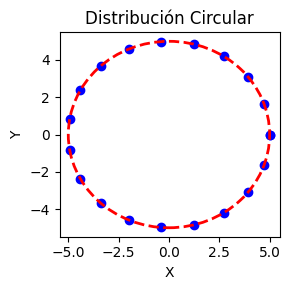

In [6]:
theta = np.linspace(0, 2*np.pi, 20) # Generar 20 ángulos equidistantes entre 0 y 2π

r = 5 # Radio del círculo
x_circular = r * np.cos(theta) 
y_circular = r * np.sin(theta)

circle = plt.Circle((0, 0), r, fill=False, color='red', linestyle='--', linewidth=2)
funciones(lambda ax: ax.scatter(x_circular, y_circular, color='blue', label='Puntos'), lambda ax: ax.add_artist(circle), 'Distribución Circular')

<h3 style = "font-family: 'OPTIMA', serif;"><b> Punto 2: Entrenamiento y Evaluación </b></h3>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Cuál es el número mínimo de épocas necesarias para un ajuste adecuado en cada caso?
</li>

In [7]:
early_stopping = EarlyStopping(monitor='loss', patience=10,restore_best_weights=True)

Los primeros resultados del modelo sin Early stop son [489.24786376953125, 45.01641082763672, 4.752358436584473, 1.1029260158538818, 0.7721506357192993, 0.7421702146530151, 0.7394527196884155, 0.7392066121101379, 0.7391840815544128, 0.7391822934150696, 0.7391820549964905, 0.7391819357872009, 0.7391824722290039, 0.7391818165779114, 0.7391821146011353, 0.7391821146011353, 0.7391821146011353, 0.73918217420578, 0.7391820549964905, 0.7391819953918457, 0.7391821146011353, 0.7391817569732666, 0.7391818761825562, 0.7391819357872009, 0.7391818761825562, 0.7391818761825562, 0.7391818761825562, 0.7391818761825562, 0.7391818761825562, 0.7391818165779114, 0.7391818165779114, 0.7391818165779114, 0.7391819953918457, 0.7391819953918457, 0.7391821146011353, 0.7391819953918457, 0.7391818761825562, 0.7391816973686218, 0.7391817569732666, 0.7391816973686218, 0.7391818165779114, 0.7391818761825562, 0.7391818761825562, 0.739181637763977, 0.7391818165779114, 0.7391819953918457, 0.7391818165779114, 0.73918169

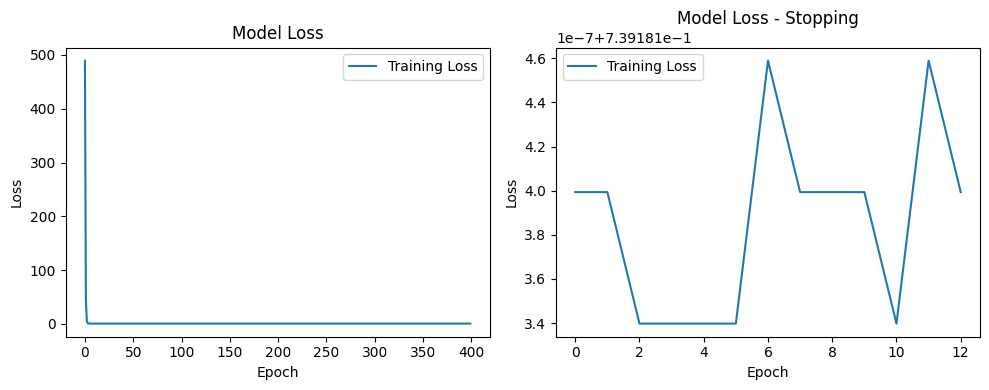

In [8]:
#Método 1 
modelo_lineal_ajustado = modelo_lineal.fit(x_lineal, y_lineal, epochs=400, verbose=0)
train_loss = modelo_lineal_ajustado.history['loss']
print("Los primeros resultados del modelo sin Early stop son", train_loss[0:50])

#Método 2
modelo_lineal_ajustado_stopping = modelo_lineal.fit(x_lineal, y_lineal, epochs=400, verbose=0, callbacks=[early_stopping])
train_loss_stopping = modelo_lineal_ajustado_stopping.history['loss']
print("El número de épocas enconstradas cuando el cambio se vuelve mínimo es", len(train_loss_stopping), "Sus resultados son", train_loss_stopping[0:len(train_loss_stopping)])

graficas(train_loss = train_loss, train_loss_stopping = train_loss_stopping)

<p style = "font-family: 'OPTIMA', serif;">
En este caso, se determinará el número óptimo de la red evaluando la relación entre el número de épocas y el cambio en la función de pérdida. Este procedimiento se aplicará tomando 500 épocas como referencia para observar esta relación. La hipótesis es que, al ser la función lineal, se necesitarán menos épocas. Visualmente, se observa que a partir de la época 300 la pérdida tuvo una variación mucho menor, por lo que este punto podría ser un buen ajuste.
<br>
En el segundo método se utilizará el método de "Early Stopping" con una espera de 10 iteraciones, como se propone en TensorFlow. Este método evalúa el cambio punto a punto entre el número de épocas y el aprendizaje, y detiene el entrenamiento cuando se detecta un descenso que supere un cierto umbral. Este enfoque tiene la ventaja de poder determinar numéricamente el número óptimo de épocas. En este caso, el número mínimo de épocas determinado es 10, lo que indica que el ajuste de la función fue rápido y que el error dejó de variar significativamente.
</p>

Los primeros resultados del modelo sin Early stop son [4179.4365234375, 504.81634521484375, 171.07740783691406, 140.1544189453125, 136.68502807617188, 135.71102905273438, 134.9700927734375, 134.2571563720703, 133.5535430908203, 132.8574981689453, 132.16879272460938, 131.4873046875, 130.81301879882812, 130.14578247070312, 129.485595703125, 128.83236694335938, 128.1859893798828, 127.5463638305664, 126.91352844238281, 126.2873306274414, 125.66767883300781, 125.0545883178711, 124.44792175292969, 123.84761810302734, 123.253662109375, 122.66593933105469, 122.0843734741211, 121.50894927978516, 120.9395980834961, 120.37617492675781, 119.81871032714844, 119.26708984375, 118.72125244140625, 118.18119812011719, 117.6468276977539, 117.11802673339844, 116.59481048583984, 116.07711029052734, 115.56486511230469, 115.0579605102539, 114.556396484375, 114.06011962890625, 113.56905364990234, 113.0831527709961, 112.60237121582031, 112.12662506103516, 111.6559066772461, 111.19010925292969, 110.729225158691

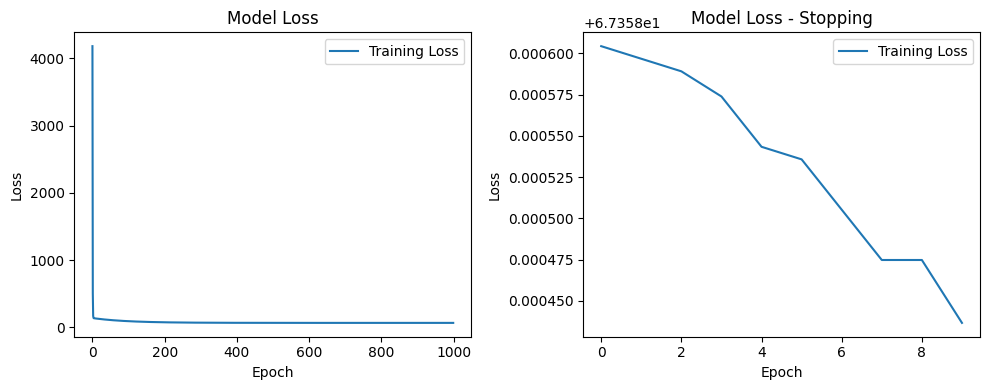

In [9]:
#Método 1
modelo_cuadratico_ajustado = modelo_cuadratico.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 0)
train_loss = modelo_cuadratico_ajustado.history['loss']
print("Los primeros resultados del modelo sin Early stop son", train_loss[0:50])

#Método 2
modelo_cuadratico_ajustado_stopping = modelo_cuadratico.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 0, callbacks=[early_stopping])
train_loss_stopping = modelo_cuadratico_ajustado_stopping.history['loss']
print("El número de épocas enconstradas cuando el cambio se vuelve mínimo es", len(train_loss_stopping), "Sus resultados son", train_loss_stopping[0:len(train_loss_stopping)])

graficas(train_loss = train_loss, train_loss_stopping = train_loss_stopping)

<p style = "font-family: 'OPTIMA', serif;">
Siguiendo esta estructura, si se realiza la comprobación de manera visual, se definiría un número óptimo de épocas de 300, de manera que no sería necesario recorrer toda la variación del desarrollo.
<br>
En el segundo caso, utilizando el método de "Early Stopping", se observa que se requiere un número de épocas mucho menor, de 23, lo que destaca que, de manera numérica, se pueden alcanzar mejores valores. Observando los resultados de la pérdida, se nota que en la primera iteración del primer caso la reducción es mucho mayor. Esto subraya que los modelos, al iniciar con valores aleatorios, pueden necesitar diferentes números de épocas e iteraciones.
</p>

Los primeros resultados del modelo sin Early stop son [44.80907440185547, 29.78348731994629, 21.61324119567871, 17.170618057250977, 14.754907608032227, 13.441337585449219, 12.72706413269043, 12.33866024017334, 12.12745189666748, 12.012591361999512, 11.95012378692627, 11.916144371032715, 11.89765739440918, 11.887593269348145, 11.882109642028809, 11.879117012023926, 11.877481460571289, 11.876581192016602, 11.876083374023438, 11.875802993774414, 11.875642776489258, 11.875547409057617, 11.875487327575684, 11.875448226928711, 11.875419616699219, 11.875394821166992, 11.87537670135498, 11.875360488891602, 11.875346183776855, 11.87533187866211, 11.87531852722168, 11.87530517578125, 11.875292778015137, 11.87528133392334, 11.87527084350586, 11.875259399414062, 11.875249862670898, 11.875239372253418, 11.87523078918457, 11.875221252441406, 11.875212669372559, 11.875204086303711, 11.87519645690918, 11.875188827514648, 11.875181198120117, 11.875173568725586, 11.875166893005371, 11.875161170959473, 1

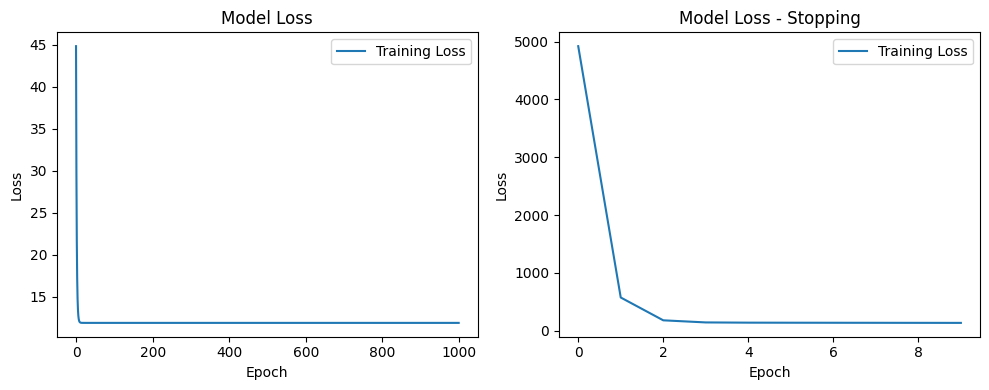

In [10]:
#Método 1
modelo_circular_ajustado = modelo_circular.fit(x_circular, y_circular, epochs=1000, verbose = 0)
train_loss = modelo_circular_ajustado.history['loss']
print("Los primeros resultados del modelo sin Early stop son", train_loss[0:50])

#Método 2
modelo_circular_ajustado_stopping = modelo_circular.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 0, callbacks=[early_stopping])
train_loss_stopping = modelo_circular_ajustado_stopping.history['loss']
print("El número de épocas enconstradas cuando el cambio se vuelve mínimo es", len(train_loss_stopping), "Sus resultados son", train_loss_stopping[0:len(train_loss_stopping)])

graficas(train_loss = train_loss, train_loss_stopping = train_loss_stopping)

<p style = "font-family: 'OPTIMA', serif;">
En este caso, el aprendizaje sigue una tendencia similar a los resultados anteriores, destacando que, en un rango de 20 épocas, la variación de la pérdida es mínima. La comprobación visual en los tres casos ha mostrado que no se necesitan las 400 épocas para ajustar el modelo, posiblemente porque las funciones son poco complejas y no se dispone de muchos datos.
<br>
En el segundo caso, se determina que el número de épocas óptimo es 15, lo que indica que se necesitan pocas iteraciones para encontrar un buen ajuste. Este número resulta ser mucho menor que el identificado de manera visual en todos los casos.
</p>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Cómo se puede determinar el número óptimo de épocas?
</li>
<p style = "font-family: 'OPTIMA', serif;">
Para encontrar el número óptimo de épocas, el indicador principal es observar cómo se relaciona la pérdida de la función con el número de épocas del modelo. Específicamente, se busca identificar un punto en el que aumentar el número de épocas no resulte en una reducción significativa de la pérdida del modelo. Este método se puede aplicar de dos formas:
<br>
<b>Comprobación visual</b>: Consiste en graficar la curva de aprendizaje de la red para el conjunto de entrenamiento, y opcionalmente para el conjunto de validación. A partir de esta gráfica, se identifica un punto en el que la curva de aprendizaje se aplana, lo que indica que el cambio en la pérdida es mínimo.
<br>
<b>Early Stopping</b>: Este método presenta la ventaja de permitir un análisis numérico durante el entrenamiento de la red. Consiste en verificar que, en cada cambio o secuencia de cambios (paciencia) de épocas, la pérdida se reduzca al menos un valor mínimo establecido. Si la reducción no cumple con este umbral, se detienen las iteraciones y la creación de nuevas épocas. Por ejemplo, se puede determinar que cuando la reducción de la pérdida entre épocas sea menor a 0.001, se detenga el entrenamiento. También es posible restablecer los pesos a los valores correspondientes al mejor desempeño del modelo.

<br>
El ajuste de estos parametros se suele hacer tomando en cuenta el conjunto de validación de los datos para evaluar la perdida de la red conforme a las iteraciones, en estos ejercicios no se realizó esta práctica dada la poca cantidad de datos establecidos.
</p>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Cómo cambia el error de entrenamiento con el aumento de las épocas?
</li>
<p style = "font-family: 'OPTIMA', serif; ">
Existe una relación crucial entre el número de épocas y la pérdida durante el entrenamiento, lo que permite determinar el número óptimo de épocas. A medida que aumenta el número de épocas, la red tiene más oportunidades para ajustar sus pesos y revisar los datos, lo que generalmente contribuye a reducir el error en el aprendizaje. Sin embargo, es importante encontrar un equilibrio, ya que en algunos casos, después de un cierto número de épocas, el error del modelo puede comenzar a incrementarse nuevamente. Por lo tanto, el punto óptimo se encuentra generalmente en un mínimo donde la pérdida ha disminuido y está cerca de volver a aumentar.
</p>

<p style = "font-family: 'OPTIMA', serif; ">Baeldung. (2023, March 16). <i>Epoch in Neural Networks</i>.Recuperado de <a href="https://www.baeldung.com/cs/epoch-neural-networks">https://www.baeldung.com/cs/epoch-neural-networks</a></p>


<h3 style = "font-family: 'OPTIMA', serif;"> <b>Punto 3: Arquitectura del Modelo </b></h3>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Es posible ajustar datos circulares con una red neuronal de una sola capa y una neurona? ¿Por qué o por qué no?
</li>

<p style = "font-family: 'OPTIMA', serif; ">No es posible ajustar datos de patrones circulares en una red neuronal con tan solo una neurona. Esto se debe a que cada neurona en una red neuronal está compuesta por pesos que se actualizan y determinan a través de una función lineal, como en el caso del perceptrón. La función que describe una neurona se puede expresar como: <code>y = Wx + b</code></p>


<p style = "font-family: 'OPTIMA', serif; ">donde <code>W</code> representa los pesos y <code>b</code> es el sesgo. Dado que esta función es lineal, no es capaz de modelar adecuadamente datos que sigan un patrón circular o no lineal. Para capturar la complejidad de estos datos, se necesita una estructura de red más compleja con múltiples capas y neuronas, que permita la transformación no lineal de los datos.</p>

<p style = "font-family: 'OPTIMA', serif; ">Para capturar patrones más complejos, como los circulares, se requiere una red neuronal con múltiples capas. Estas redes pueden usar funciones de activación no lineales y múltiples capas de neuronas para transformar los datos de manera no lineal, de esta manera se pueden modelar relaciones como la circular en este caso.</p>

<p style="font-family: 'OPTIMA', serif;">The Modern Scientist. (2024. Enero.). <i>Unlocking Complexities: The Role of Nonlinear Relationships and Hidden Layers in Neural Networks</i>. Recuperado de: <a href="https://medium.com/the-modern-scientist/unlocking-complexities-the-role-of-nonlinear-relationships-and-hidden-layers-in-neural-networks-fca9631fd2fd">https://medium.com/the-modern-scientist/unlocking-complexities-the-role-of-nonlinear-relationships-and-hidden-layers-in-neural-networks-fca9631fd2fd</a></p>




<h3 style = "font-family: 'OPTIMA', serif;"> <b>Punto 4: Función de Activación </b></h3>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Qué sucede si cambiamos la función de activación a ReLU o sigmoide para los datos parabólicos y circulares?
</li>

<h5 style = "font-family: 'OPTIMA', serif;"> Datos Cuadraticos </h5>

In [11]:
modelo_cuadratico = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
modelo_cuadratico.compile(optimizer='sgd', loss='mean_squared_error')
modelo_cuadratico.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 1, callbacks=[early_stopping])

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 4930.7744

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 4930.7744


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 574.0232

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 574.0232


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 178.4458

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 178.4458


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 141.9064

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 141.9064


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 137.9166

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 137.9166


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 136.8841

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 136.8841


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 136.1267

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 136.1267


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 135.4012

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 135.4012


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 134.6855

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 134.6855


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 133.9776

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 133.9776


In [12]:
modelo_cuadratico_relu = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], activation='relu')])
modelo_cuadratico_relu.compile(optimizer='sgd', loss='mean_squared_error')
start_time = time.time()
modelo_cuadratico_relu.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 1, callbacks=[early_stopping])
end_time = time.time()

print(f'Tiempo total de entrenamiento: {end_time-start_time:.2f} segundos')

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 4920.8218


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4920.8218


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8223

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4920.8223


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8218


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8218


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8223

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8223


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8218


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8218


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8218

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8218


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4920.8223

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4920.8223


Tiempo total de entrenamiento: 0.20 segundos


In [13]:
modelo_cuadratico_sigmoid = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], activation='sigmoid')])
modelo_cuadratico_sigmoid.compile(optimizer='sgd', loss='mean_squared_error')
start_time = time.time()
modelo_cuadratico_sigmoid.fit(x_cuadratico, y_cuadratico, epochs=1000, verbose = 1, callbacks=[early_stopping])
end_time = time.time()

print(f'Tiempo total de entrenamiento: {end_time-start_time:.2f} segundos')

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4811.7324

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 4811.7324


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4811.7295

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7295


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4811.7266

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7266


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4811.7236

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7236


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4811.7212

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4811.7212


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4811.7178

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7178


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4811.7158

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7158


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4811.7134

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7134


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4811.7104

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7104


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4811.7080

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4811.7080


Tiempo total de entrenamiento: 0.21 segundos


<p style = "font-family: 'OPTIMA', serif; ">
La función de activación ReLU o Sigmoid determina si los pesos que ingresan a la neurona la activarán para la transmisión de datos. La función ReLU activa de forma lineal todos los valores de entrada mayores a cero, mientras que la función Sigmoid tiende a saturarse con valores negativos. En el caso de los datos parabólicos, se puede observar que con ambas funciones de activación, el aprendizaje de la red se mantuvo constante, ya que no hubo gran variación en las pérdidas por cada iteración.
</p>

<h5 style = "font-family: 'OPTIMA', serif;"> Datos Circulares </h5>

In [14]:
modelo_circular = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
modelo_circular.compile(optimizer='sgd', loss='mean_squared_error')
modelo_circular.fit(x_circular, y_circular, epochs=1000, verbose = 1, callbacks=[early_stopping])

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 33.4442

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 33.4442


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6037

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.6037


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.2528

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2528


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.3432

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.3432


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7611

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.7611


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.9008

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.9008


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.4330

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.4330


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.1787

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.1787


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.0403

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.0403


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9651

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.9651


In [15]:
modelo_circular_relu = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], activation='relu')])
modelo_circular_relu.compile(optimizer='sgd', loss='mean_squared_error')
start_time = time.time()
modelo_circular_relu.fit(x_circular, y_circular, epochs=1000, verbose = 1, callbacks=[early_stopping])
end_time = time.time()

print(f'Tiempo total de entrenamiento: {end_time-start_time:.2f} segundos')

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 20.0260

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 20.0260


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.0960

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.0960


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.6235

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.6235


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.5000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.5000


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.6428

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6428


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.9888

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.9888


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.4899

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.4899


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.1092

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.1092


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8187

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.8187


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.5970

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.5970


Tiempo total de entrenamiento: 0.20 segundos


In [16]:
modelo_circular_sigmoid = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], activation='sigmoid')])
modelo_circular_sigmoid.compile(optimizer='sgd', loss='mean_squared_error')
start_time = time.time()
modelo_circular_sigmoid.fit(x_circular, y_circular, epochs=1000, verbose = 1, callbacks=[early_stopping])
end_time = time.time()

print(f'Tiempo total de entrenamiento: {end_time-start_time:.2f} segundos')

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 12.3034

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 12.3034


Epoch 2/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3034

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.3034


Epoch 3/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3033

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.3033


Epoch 4/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3033

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3033


Epoch 5/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3033

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3033


Epoch 6/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3032

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.3032


Epoch 7/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3032

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3032


Epoch 8/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3031

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3031


Epoch 9/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3031

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3031


Epoch 10/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3031

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3031


Tiempo total de entrenamiento: 0.21 segundos


<p style = "font-family: 'OPTIMA', serif;">
Cuando se tienen datos circulares, en las primeras iteraciones el error del modelo es mucho mayor si no se utiliza una función de activación como ReLU o Sigmoid. Además, como en el caso anterior, la pérdida se mantiene muy similar en las iteraciones, por lo que no se observa una disminución considerable.
</p>

<p style = "font-family: 'OPTIMA', serif;">Codificando Bits. (2024). <i>La FUNCIÓN DE ACTIVACIÓN</i>. YouTube. Recuperado de, <a href="https://www.youtube.com/watch?v=lFODTDO8mMw">https://www.youtube.com/watch?v=lFODTDO8mMw</a></p>


<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Cómo afecta esto al ajuste y la convergencia del modelo?
</li>
<p style = "font-family: 'OPTIMA', serif;">
La velocidad de convergencia de un modelo puede variar según la función de activación utilizada. Por ejemplo, ReLU (Rectified Linear Unit) permite una convergencia más rápida debido a su naturaleza lineal para valores positivos, lo que facilita la propagación de gradientes. En contraste, la función Sigmoide, aunque útil para problemas de clasificación, puede ralentizar el entrenamiento ya que tiende a saturarse, produciendo gradientes muy pequeños que hacen el aprendizaje más lento. Por tanto, la elección de la función de activación es crucial para un ajuste eficiente del modelo.
</p>

<h3 style = "font-family: 'OPTIMA', serif;"> <b>Punto 5: Generalizar </b></h3>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Cómo se puede evaluar la capacidad del modelo para generalizar a nuevos datos?
</li>

<p style = "font-family: 'OPTIMA', serif; ">
En modelos supervisados, existen diversas técnicas para asegurar una buena generalización y un aprendizaje efectivo en datos nuevos. En el caso de las redes neuronales, debido a su tendencia a sobreajustar los datos de entrenamiento, se aplican técnicas específicas para abordar este problema. Una de las estrategias básicas consiste en dividir los datos en conjuntos de entrenamiento y prueba, lo cual permite evaluar el desempeño del modelo con datos que no ha visto antes. Esta práctica se fortalece mediante el uso de la validación cruzada, que proporciona diferentes subconjuntos de datos al modelo para probar su rendimiento de manera más robusta.
</p>

<li style = "font-family: 'OPTIMA', serif; font-size:16px;">
¿Qué técnicas se pueden usar para evitar el sobreajuste?
</li>

<p style = "font-family: 'OPTIMA', serif;">
odría ser útil agregar datos al modelo con un poco de ruido que no siga el comportamiento del conjunto de datos original. Esto ayuda al modelo a aprender sobre aspectos irregulares y puede prevenir el sobreajuste durante la validación. Además de la validación cruzada mencionada anteriormente, se pueden emplear técnicas de regularización como L1 (Lasso), L2 (Ridge) o una combinación de ambas. Estas técnicas añaden una penalización o costo adicional para reducir la magnitud de los coeficientes, ayudando a mejorar la capacidad del modelo para generalizar en datos nuevos. En el caso de L1 el término de la penzalización se hace con base en el valor absoluto de la suma de los coeficientes esto hace que ciertos valores puedan ser iguales a 0 y una reducción muhco mayor en características. Mientras que en el caso de la regularización L2 esta se hace con la suma de los cuadrados de los coeficientes en donde si bien se reducen los valores de los coeficientes, no necesariemente llegan a 0 lo cual es bueno para evitar un sobreajuste de manera menos radical. La elección de cuál caso se usa va de acuerdo a la elección del modelo.
</p>
<p style = "font-family: 'OPTIMA', serif;">Turing. (2024). <i>A Guide to Making Deep Learning Models Generalize Better</i>.Recuperado de, <a href="https://www.turing.com/kb/making-deep-learning-models-generalize-better">https://www.turing.com/kb/making-deep-learning-models-generalize-better</a></p>
<p style="font-family: 'OPTIMA', serif;">Ramírez Sosa, G. (n.d.). <i>Entendiendo la Regularización L1 y L2: Dominando el Enfoque de Regularización en Machine Learning</i>. Recuperado de, <a href="https://www.linkedin.com/pulse/entendiendo-la-regularización-l1-y-l2-dominando-el-en-ramirez-sosa-gyvee/">https://www.linkedin.com/pulse/entendiendo-la-regularización-l1-y-l2-dominando-el-en-ramirez-sosa-gyvee/</a></p>



In [17]:
modelo_lineal = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], kernel_regularizer=regularizers.l1(0.01))])
modelo_lineal.compile(optimizer='sgd', loss='mean_squared_error')

modelo_cuadratico = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], kernel_regularizer=regularizers.l1(0.01))])
modelo_cuadratico.compile(optimizer='sgd', loss='mean_squared_error')

modelo_circular = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], kernel_regularizer=regularizers.l1(0.01))])
modelo_circular.compile(optimizer='sgd', loss='mean_squared_error')